In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Opening a FITS file

In [2]:
fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/tile_100000.fits")

hdul = fits_image_filename

In [3]:
fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/tile_100000.fits")

hdul = fits_image_filename

In [4]:
hdul.info()

Filename: /Users/matt/Desktop/DESI_Research/Intro_to_fits/tile_100000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  FIBERASSIGN    1 BinTableHDU     37   5000R x 14C   [J, J, I, J, K, K, K, K, D, D, E, E, 8A, J]   
  2  POTENTIAL     1 BinTableHDU     11   10762R x 1C   [K]   
  3  SKYETC        1 BinTableHDU     37   20R x 14C   [J, J, I, J, K, K, K, K, D, D, E, E, 8A, J]   


Working with FITS Headers

In [5]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [6]:
#print(hdul[3].header)

In [7]:
#print(repr(hdul[0].header))

Working with image data

In [8]:
data1 = hdul["FIBERASSIGN"].data # data also = to hdul[1].data

In [9]:
data1.shape


print(type(data1))

<class 'astropy.io.fits.fitsrec.FITS_rec'>


In [10]:
data1.dtype.name

'record656'

Working with table data

In [11]:
print(data1[0])

(0, 95, 5, 1, -1, 0, 0, 0, 29.416909735516672, -4.28212413119413, -4.134643, -176.01639, 'notbrick', 4)


In [12]:
data1.field(1) 

array([  95,   62,  102, ..., 9226, 9261, 9458], dtype=int32)

In [13]:
data1.field('NUMTARGET')

array([5, 2, 1, ..., 3, 2, 3], dtype=int16)

In [14]:
cols = hdul[1].columns

In [15]:
cols.info()

name:
    ['FIBER', 'LOCATION', 'NUMTARGET', 'PRIORITY', 'TARGETID', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'RA', 'DEC', 'XFOCAL_DESIGN', 'YFOCAL_DESIGN', 'BRICKNAME', 'FIBERMASK']
format:
    ['J', 'J', 'I', 'J', 'K', 'K', 'K', 'K', 'D', 'D', 'E', 'E', '8A', 'J']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
coord_type:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
coord_unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
coord_ref_point:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '']
coord_ref_value:
    ['', '', '', '

In [16]:
hdul[1].columns

ColDefs(
    name = 'FIBER'; format = 'J'
    name = 'LOCATION'; format = 'J'
    name = 'NUMTARGET'; format = 'I'
    name = 'PRIORITY'; format = 'J'
    name = 'TARGETID'; format = 'K'
    name = 'DESI_TARGET'; format = 'K'
    name = 'BGS_TARGET'; format = 'K'
    name = 'MWS_TARGET'; format = 'K'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'XFOCAL_DESIGN'; format = 'E'
    name = 'YFOCAL_DESIGN'; format = 'E'
    name = 'BRICKNAME'; format = '8A'
    name = 'FIBERMASK'; format = 'J'
)

In [17]:
cols.names

['FIBER',
 'LOCATION',
 'NUMTARGET',
 'PRIORITY',
 'TARGETID',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'RA',
 'DEC',
 'XFOCAL_DESIGN',
 'YFOCAL_DESIGN',
 'BRICKNAME',
 'FIBERMASK']

In [21]:
fiber_data = Table(hdul["FIBERASSIGN"].data)

fiber_data

FIBER,LOCATION,NUMTARGET,PRIORITY,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,RA,DEC,XFOCAL_DESIGN,YFOCAL_DESIGN,BRICKNAME,FIBERMASK
int32,int32,int16,int32,int64,int64,int64,int64,float64,float64,float32,float32,str8,int32
0,95,5,1,-1,0,0,0,29.416909735516672,-4.28212413119413,-4.134643,-176.01639,notbrick,4
1,62,2,1,-1,0,0,0,29.58667004906363,-4.35837668858977,-45.58638,-157.1347,notbrick,4
2,102,1,1,-1,0,0,0,29.596883309851247,-4.208321135788345,-48.26472,-194.58679,notbrick,2
3,82,3,1,-1,0,0,0,29.52916260861867,-4.295863937341604,-31.579592,-172.63538,notbrick,2
4,131,2,1,-1,0,0,0,29.372787297103333,-4.180777308685733,6.672006,-201.3858,notbrick,2
5,108,2,1,288230450420253444,4294967296,0,0,29.361867904663086,-4.266130447387695,9.327732,-180.01004,0294m042,0
6,119,2,1,288230450420253383,4294967296,0,0,29.35671043395996,-4.198378562927246,10.6086445,-196.96909,0294m042,0
7,64,3,1,288230450420252753,4294967296,0,0,29.49448013305664,-4.359685897827148,-23.062443,-156.74832,0294m042,0
8,72,2,1,288230450420252928,4294967296,0,0,29.553428649902344,-4.326733589172363,-37.48888,-164.96867,0296m042,0


In [49]:
len(data1.field("NUMTARGET"))


5000

In [50]:
data1 = hdul["FIBERASSIGN"].data

In [51]:
len(data1.field("NUMTARGET"))

5000

In [52]:
len(data1.field("RA"))

5000

In [53]:
len(data1.field("DEC"))

5000

In [54]:
RA = data1.field("RA")
DEC = data1.field("DEC")

RA_Mean = data1.field("RA").mean()
DEC_Mean = data1.field("DEC").mean()

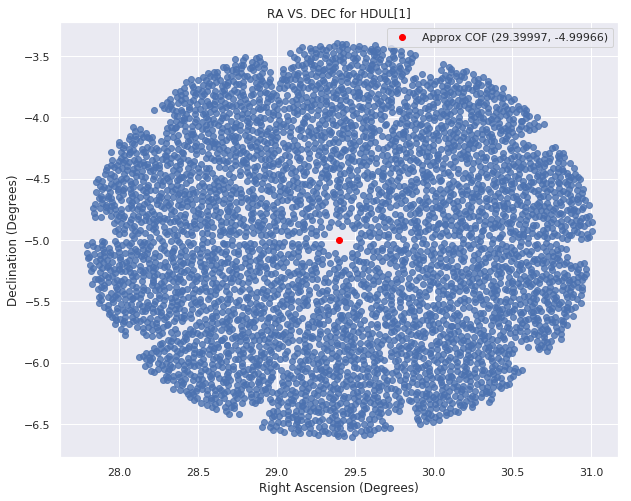

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(RA,DEC , alpha = 0.8)
plt.scatter(RA_Mean,DEC_Mean, color = 'red', label = "Approx COF (29.39997, -4.99966)")
plt.xlabel("Right Ascension (Degrees)")
plt.ylabel("Declination (Degrees)")
plt.title("RA VS. DEC for HDUL[1]")
plt.legend()